In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn.preprocessing as p
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


import sklearn.ensemble as es


#Cleveland

data=pd.read_csv('processed.cleveland.data',header=None)
data.columns = ["Age","Sex", "CP", "trestbps", "chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data = data[data != '?']
data=data.dropna()
X=data[["Age","Sex", "CP", "trestbps", "chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]].values
y=data[["num"]].values[:,0]
X = preprocessing.scale(X)
y[y!=0]=1


/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(297, 13)
(297,)


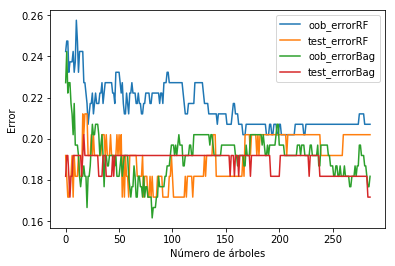

In [13]:
#parte 1a
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


min_estimators = 15
max_estimators = 300
print(X.shape)
print(y.shape)


clf=RandomForestClassifier(n_estimators=100,oob_score=True,random_state=42)
oob_errorBag=[]
test_errorBag=[]

for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)           
    oob_errorBag.append(1 - clf.oob_score_)
    test_errorBag.append(1-clf.score(X_test,y_test))

clf=es.BaggingClassifier(n_estimators=100,oob_score=True,random_state=42)
oob_errorRF=[]
test_errorRF=[]
ies=[]
for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)
    ies.append(i)
    oob_errorRF.append(1 - clf.oob_score_)
    test_errorRF.append(1-clf.score(X_test,y_test))

            
plt.plot(ies,oob_errorRF,label='oob_errorRF')
plt.plot(ies,test_errorRF,label='test_errorRF')
plt.plot(ies,oob_errorBag,label='oob_errorBag')
plt.plot(ies,test_errorBag,label='test_errorBag')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Número de árboles')
plt.show()

(1070, 5)
(1070,)


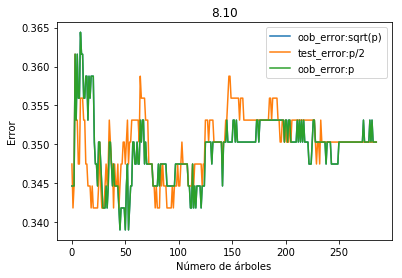

In [23]:
#parte 1b
data=pd.read_csv('OJ.csv')
X=data[['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH']].values
y=data[['Purchase']].values.reshape(-1,1)[:,0]
X=p.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


min_estimators = 15
max_estimators = 300
print(X.shape)
print(y.shape)


clf=RandomForestClassifier(max_features='sqrt',n_estimators=100,random_state=42)
test_errorsqrt=[]

for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)           
    test_errorsqrt.append(1-clf.score(X_test,y_test))

clf=RandomForestClassifier(max_features=3,n_estimators=100,random_state=42)
test_errorp2=[]

for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)           
    test_errorp2.append(1-clf.score(X_test,y_test))

clf=RandomForestClassifier(n_estimators=100,random_state=42)
test_errorp=[]

for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)           
    test_errorp.append(1-clf.score(X_test,y_test))

plt.plot(test_errorsqrt,label='oob_error:sqrt(p)')
plt.plot(test_errorp2,label='test_error:p/2')
plt.plot(test_errorp,label='oob_error:p')

plt.legend()
plt.ylabel('Error')
plt.xlabel('Número de árboles')
plt.title('8.10')
plt.show()

Average precision-recall score: 0.52
Linear Discriminant Analysis


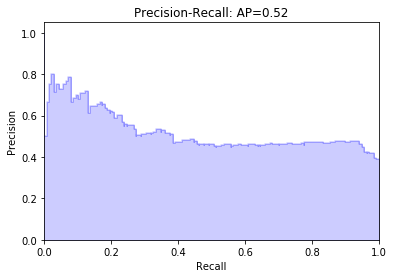

Average precision-recall score: 0.52
Logistica


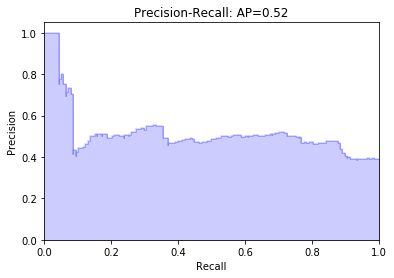

ValueError: bad input shape (354, 2)

In [26]:
##Segunda parte
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score


clfs=[RandomForestClassifier(n_estimators=100,oob_score=True,random_state=42),es.BaggingClassifier(n_estimators=100,oob_score=True,random_state=42),LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),LogisticRegression(solver='lbfgs')]
label=['Random Forest', 'Bagging','Linear Discriminant Analysis','Logistica']

data=pd.read_csv('OJ.csv')
X=data[['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH']].values
y=data[['Purchase']].values.reshape(-1,1)[:,0]
X=p.normalize(X)
y[y=='CH']=0
y[y=='MM']=1
y=y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for i in range(2,4):
    clf=clfs[i]
    clf.fit(X_train, y_train)       
    y_score = clf.decision_function(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    print(label[i])

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: AP={0:0.2f}'.format(
              average_precision))
    plt.show()
    
   
for i in range(2,4):
    clf=clfs[i]
    clf.fit(X_train, y_train)       
    y_score = clf.predict_proba(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    print(label[i])

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: AP={0:0.2f}'.format(
              average_precision))
    plt.show()
    
print('Teniendo en cuenta ls curvas de precisión de LDA y regresión logística, encuentro que ninguna de las dos es buena para la clasificación en este problema, elegiría el método de Bagging, ya que presentó mejores resultados en los puntos anteriores con este conjunto de datos')
    